# Peak fitting for Scherrer analysis

## Data prep before this step

- perform batch integration on a set of GIWAXS data
- the integrations should all be in the same angular range
- these integrations should be put in a CSV file, where the first column is the q-values and the following columns are the integrations


## Fitting function

- this script fits an isolated peak to $ y = mx + c + Gaussian$
- represented by $y = mx + c + A \cdot e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$
- $x$ and $y$ are q-values and integrated intensities, repsectively (`x`, `y` in the script)
- $m$ and $c$ are linear background (`m`, `c`)
- $A$ is amplitude of Gaussian peak (`A`)
- $\mu$ is mean of Gaussian  (`mu`) 
- $\sigma$ is standard deviation / width of Gaussian  (`sigma`) 

In [65]:
# import libraries and modules here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.optimize import curve_fit

In [66]:
# all functions used in script go here


# combined linear + Gaussian function
def linear_gaussian_func(x, m, c, A, mu, sigma):
    linear_part = m * x + c
    gaussian_part = A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
    return linear_part + gaussian_part


# def linear_func(x, m, c):
#     return m * x + c

# def gaussian_func(x, A, mu, sigma):
#     return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

In [67]:
# enter filepath and filename 
# remember .csv at the end of filename
data = pd.read_csv('/home/goughl/Documents/beamtime_data/2112_ESRF/MAR/ANDREAS/test_OoP_curves.csv')
x = data.iloc[2:, 0].values.astype(float)  # Skip header for x values
y_values = data.iloc[2:, 1:].values.astype(float)  # Skip header for y values
dataset_labels = data.columns[1:].tolist() 

print(dataset_labels)
# # data should be in following format: first col is x values (the qvalues)
# # following columns contain integrations with one peak isolated
# script can be used with no prior BG removal
# # in csv format!

['RT', '60', '80', '100', '120', '140']


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

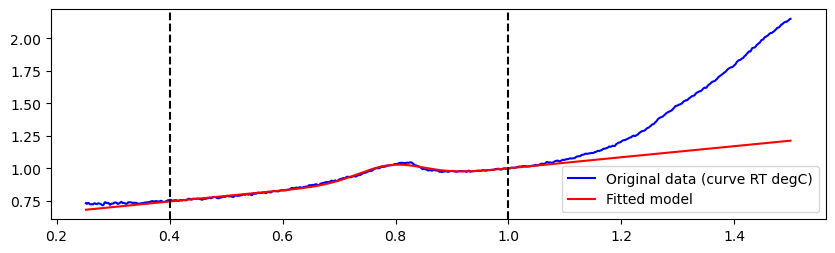

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

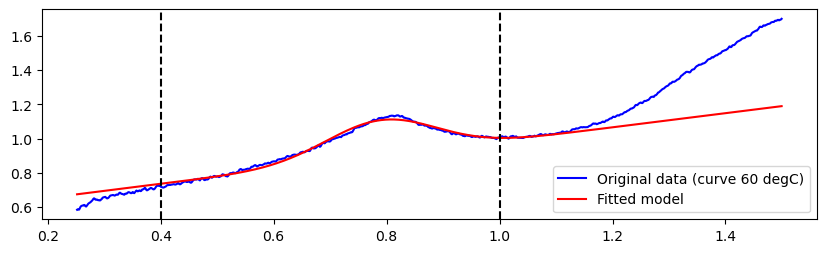

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

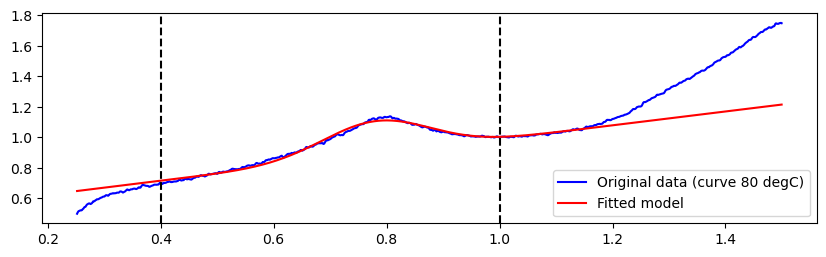

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

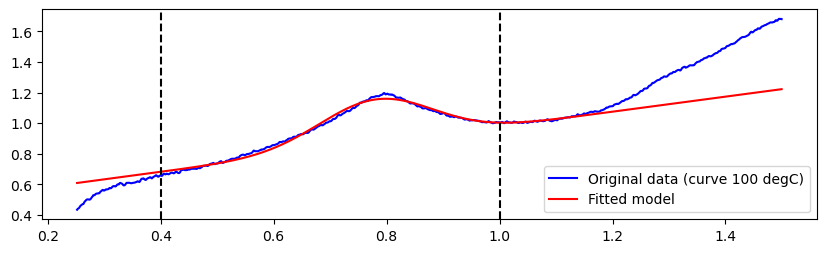

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

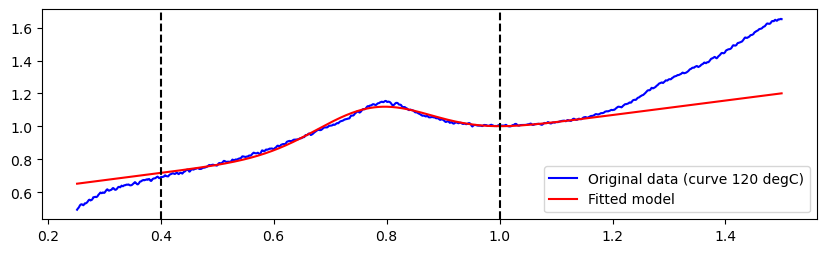

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

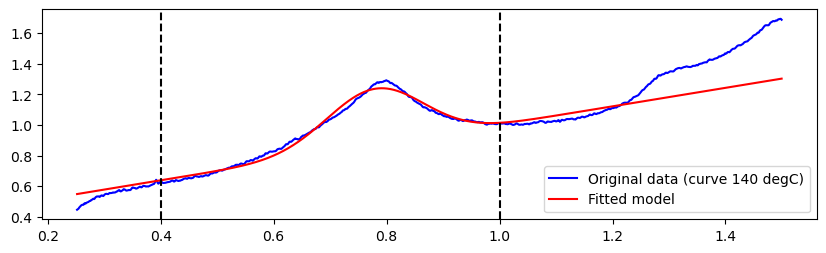

In [88]:
# define the min and max x values / q-range for fitting
fit_range_min = 0.4
fit_range_max = 1
# there should only be one peak within the defined range!!


# empty list to store parameters for each dataset
params_list = []

for i in range(y_values.shape[1]):
    y = y_values[:, i]

    # masks data outside defined range
    fit_mask = (x >= fit_range_min) & (x <= fit_range_max)
    x_fit = x[fit_mask]
    y_fit = y[fit_mask]

    # initial guesses for m, c, A, mu, sigma
    initial_guess = [1, np.mean(y_fit), max(y_fit), x_fit[np.argmax(y_fit)], 0.1]

    # Fit the combined model with bounds to enforce positive sigma
    params, _ = curve_fit(
        linear_gaussian_func, 
        x_fit, 
        y_fit, 
        p0=initial_guess, 
        bounds=([-np.inf, -np.inf, -np.inf, -np.inf, 0], np.inf)  # Enforces positive sigma
    )
    
    m, c, A, mu, sigma = params

    # Append the parameters for this dataset to the list
    params_list.append([dataset_labels[i], m, c, A, mu, sigma])

    # plotting
    fitted_model = linear_gaussian_func(x, m, c, A, mu, sigma)
    residuals = y - fitted_model
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(x, y, 'b-', label=f'Original data (curve {dataset_labels[i]} degC)')
    plt.plot(x, fitted_model, 'r-', label=f'Fitted model')
    plt.axvline(fit_range_min, color='k', linestyle='--')
    plt.axvline(fit_range_max, color='k', linestyle='--')
    plt.legend()
    
# residuals should just be slightly noisy - do this as sanity check     
#     plt.subplot(2, 1, 2)
#     plt.plot(x, residuals, 'g-', label='Residuals')
#     plt.legend()
     
    plt.show()


In [98]:
params_df = pd.DataFrame(params_list, columns=['Dataset', 'm', 'c', 'A', 'mu', 'sigma'])

 - Cell below calculates full width at half maximum (`fwhm`) using: $FWHM = 2\sqrt{2 ln(2)} \cdot \sigma \approx 2.355 $ 

In [99]:
# loops through calculated params and finds FWHM based on above formula using standard deviation sigma
params_list_with_fwhm = []

for params in params_list:
    dataset_label, m, c, A, mu, sigma = params
    fwhm = 2.355 * sigma  # FWHM calculation
    params_list_with_fwhm.append([dataset_label, m, c, A, mu, sigma, fwhm])

# Create a DataFrame including FWHM
params_df = pd.DataFrame(params_list_with_fwhm, columns=['Dataset', 'm', 'c', 'A', 'mu', 'sigma', 'FWHM'])

# Print the updated DataFrame with FWHM
print(params_df)

  Dataset         m         c         A        mu     sigma      FWHM
0      RT  0.425485  0.575677  0.113927  0.791751  0.058662  0.138149
1      60  0.412961  0.570767  0.211513  0.789645  0.097623  0.229901
2      80  0.454282  0.534552  0.218444  0.780647  0.095222  0.224248
3     100  0.491092  0.485946  0.286129  0.780689  0.100496  0.236668
4     120  0.439636  0.541680  0.232135  0.777115  0.100791  0.237362
5     140  0.604057  0.396466  0.368694  0.779260  0.085574  0.201527


In [101]:
# calculating coherence length of crystallites in nm

K = 1  # Scherrer constant, assume to be 1

params_df['D'] = (2 * np.pi * K) / params_df['FWHM'] / 10
# division by 10 here is to convert from Angstrom to nanometers

print(params_df[['Dataset', 'D']])

  Dataset         D
0      RT  4.548134
1      60  2.732995
2      80  2.801888
3     100  2.654849
4     120  2.647086
5     140  3.117795


In [95]:
# # not essential for calculating FWHM 
# # plots both parts of fit - the linear part and the isolated Gaussian
# # this is to check it looks sensible

# # loop through each dataset to plot the original data, combined fit, linear, and Gaussian parts
# for i in range(y_values.shape[1]):
#     y = y_values[:, i]
    
#     # retrieve parameters from the DataFrame
#     m = params_df.loc[i, 'm']
#     c = params_df.loc[i, 'c']
#     A = params_df.loc[i, 'A']
#     mu = params_df.loc[i, 'mu']
#     sigma = params_df.loc[i, 'sigma']
    
#     # calculate indiviual components
#     linear_component = m * x + c # linear
#     gaussian_component = A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) # Gaussian
#     combined_fit = linear_component + gaussian_component  # linear + Gaussian

#     plt.figure(figsize=(12, 8))

#     # plot 1: original data with combined fit
#     plt.subplot(4, 1, 1)
#     plt.plot(x, y, 'b-', label=f'Original Data ({dataset_labels[i]} °C)')
#     plt.plot(x, combined_fit, 'r--', label='Combined Fit (Linear + Gaussian)')
#     plt.axvline(fit_range_min, color='k', linestyle='--', label='Fit range')
#     plt.axvline(fit_range_max, color='k', linestyle='--')
#     plt.title(f'{dataset_labels[i]} °C data')
#     plt.legend()

#     # plot 2: linear component only
#     plt.subplot(4, 1, 2)
#     plt.plot(x, linear_component, 'g-', label='Linear Component (y = mx + c)')
#     plt.legend()


#     # plot 3: Gaussian component only
#     plt.subplot(4, 1, 3)
#     plt.plot(x, gaussian_component, 'm-', label=f'Gaussian Component for {dataset_labels[i]} °C sample')
#     plt.legend()

# #     # plot 4: Original data minus linear component (isolated Gaussian data)
# #     plt.subplot(4, 1, 4)
# #     plt.plot(x, y - linear_component, 'b-', label='Isolated Gaussian Data')
# #     plt.plot(x, gaussian_component, 'r--', label='Fitted Gaussian')
# #     plt.legend()

#     plt.xlabel('x')
#     plt.ylabel('Intensity')
#     plt.tight_layout()
#     plt.show()
